### 2.6.1Q学习算法
和Sarsa不同的就是动作价值函数的更新公式不同
Sarsa:
$$Q(s_t,a_t)=Q(s_t,a_t)+\eta*(R_{t+1}+\gamma *Q(s_{t+1},a_{t+1})-Q(s_t,a_t))$$
Q学习：
$$Q(s_t,a_t)=Q(s_t,a_t)+\eta*(R_{t+1}+\gamma\max\limits_a *Q(s_{t+1},a)-Q(s_t,a_t))$$
Sarsa更新时需要求取下一步动作$s_{t+1}$用于更新，Q学习使用状态$s_{t+1}$下动作价值函数中的最大值来进行更新，由于Sarsa使用下一个动作$a_{t+1}$来更新动作价值函数Q，因此Sarsa算法的特征之一是Q更新依赖于求取$a_{t+1}$的策略，策略依赖型特征。由于$\epsilon-$贪婪法产生的随机性不用于更新公式，Q的收敛优于Sarsa
### 2.6.2Q学习的实现
和Sarsa类似

In [38]:
#导入所使用的包
import numpy as np
import pylab as plt
%matplotlib inline

In [39]:
 
#行为状态0~7,列用↑、→、↓、←表示移动的方向
theta_0 = np.array([[np.nan,1,1,np.nan],     #S0
                    [np.nan,1,np.nan,1],     #S1
                    [np.nan,np.nan,1,1],     #S2
                    [1,1,1,np.nan],     #S3
                    [np.nan,np.nan,1,1],     #S4
                    [1,np.nan,np.nan,np.nan],#S5
                    [1,np.nan,np.nan,np.nan],#S6
                    [1,1,np.nan,np.nan],     #S7
                    ])     #S8是目标，无策略
[a,b] = theta_0.shape
Q = np.random.rand(a,b) * theta_0
def simple_convert_into_pi_from_theta(theta):

    [m,n] = theta.shape #获取θ矩阵的大小
    pi = np.zeros((m,n))
    for i in range(m):
        pi[i,:]=theta[i,:]/np.nansum(theta[i,:])
    pi = np.nan_to_num(pi) #将nan转为0
    return pi

# 求解初始策略
pi_0 = simple_convert_into_pi_from_theta(theta_0)
print(f'初始策略：\n{pi_0}')

初始策略：
[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [40]:
# 定义求取动作a
def get_action(s,Q,epsilon,pi_0):
    direction = ['up','right','down','left']

    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction,p=pi_0[s,:])
    else:
        next_direction = direction[np.nanargmax(Q[s,:])]
    if next_direction == 'up':
        action = 0
        s_next = s - 3 #向上移动状态数字减3
    elif next_direction == 'right':
        action = 1

    elif next_direction == 'down':
        action = 2

    elif next_direction == 'left':
        action = 3

    return action

# 定义求取动作a以及1步后移动的状态s
def get_s_next(s,a,Q,epsilon,pi_0):
    direction = ['up','right','down','left']
    next_direction = direction[a]

    if next_direction == 'up':
        s_next = s - 3 #向上移动状态数字减3
    elif next_direction == 'right':
        s_next = s + 1 #向→移动状态数字+1
    elif next_direction == 'down':
        s_next = s + 3 #向下移动状态数字+3
    elif next_direction == 'left':
        s_next = s - 1 #向左移动状态数字-1
    return s_next

In [41]:
def Q_learing(s,a,r,s_next,a_next,Q,eta,gamma):

    if s_next == 8:
        Q[s,a] = Q[s,a]+eta*(r-Q[s,a])
    else:
        Q[s,a] = Q[s,a] + eta*(r+gamma*np.nanmax(Q[s_next,:])-Q[s,a])
    return Q

In [42]:
#Sarsa求解迷宫问题的函数

def goal_maze_ret_s_a_Q(Q,epsilon,eta,gamma,pi):
    s = 0#开始地点
    a = a_next = get_action(s,Q,epsilon,pi)
    s_a_history = [[0,np.nan]] #记录智能体移动列表

    while(1):
        a = a_next
        s_a_history[-1][1] = a #带入当前状态，最后一个状态的动作
        s_next = get_s_next(s,a,Q,epsilon,pi)

        s_a_history.append([s_next,np.nan])

        if s_next == 8:
            r=1
            a_next = np.nan
        else:
            r=0
            a_next = get_action(s_next,Q,epsilon,pi)

        Q = Q_learing(s,a,r,s_next,a_next,Q,eta,gamma)

        if s_next == 8:
            break
        else:
            s = s_next
    return [s_a_history,Q]


In [43]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q,axis=1)
is_continue = True
episode = 1

V=[]
V.append(np.nanmax(Q,axis=1))
while is_continue:
    print(f'当前回合：{episode}')
    epsilon /=2
    [s_a_history,Q] = goal_maze_ret_s_a_Q(Q,epsilon,eta,gamma,pi_0)

    #状态价值的变化
    new_v = np.nanmax(Q,axis = 1)
    print(np.sum(np.abs(new_v-v)))
    episode += 1
    if episode > 100:
        break

当前回合：1
1.1534760363523024
当前回合：2
1.379220631679136
当前回合：3
1.8683991694406448
当前回合：4
1.8678613470349117
当前回合：5
1.859368203728763
当前回合：6
1.849361626098037
当前回合：7
1.8450255615331146
当前回合：8
1.8400805982641013
当前回合：9
1.8345313498676874
当前回合：10
1.8283932728250454
当前回合：11
1.8216909217467103
当前回合：12
1.8144562943688003
当前回合：13
1.8067272912655739
当前回合：14
1.7985463057538569
当前回合：15
1.789958952101864
当前回合：16
1.7810129345152736
当前回合：17
1.771757055136093
当前回合：18
1.7622403561868998
当前回合：19
1.752511389201195
当前回合：20
1.7426176028146096
当前回合：21
1.7326048396982598
当前回合：22
1.722516932768456
当前回合：23
1.7123953907026608
当前回合：24
1.702279162945606
当前回合：25
1.7017798636749195
当前回合：26
1.7095316400667675
当前回合：27
1.7169554841856736
当前回合：28
1.7240595921248099
当前回合：29
1.7308531889914458
当前回合：30
1.7373461620871722
当前回合：31
1.7435487790840434
当前回合：32
1.7494714742717927
当前回合：33
1.7551246889858343
当前回合：34
1.7605187548586922
当前回合：35
1.76566381064657
当前回合：36
1.7705697451343014
当前回合：37
1.7752461600724212
当前回合：38
1.7797023482

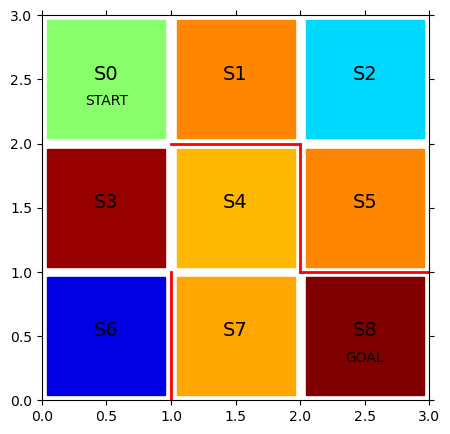

In [44]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#画出红色的墙壁
plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

#画出表示状态的文字S0-S8
plt.text(0.5,2.5,'S0',size=14,ha='center')
plt.text(1.5,2.5,'S1',size=14,ha='center')
plt.text(2.5,2.5,'S2',size=14,ha='center')
plt.text(0.5,1.5,'S3',size=14,ha='center')
plt.text(1.5,1.5,'S4',size=14,ha='center')
plt.text(2.5,1.5,'S5',size=14,ha='center')
plt.text(0.5,0.5,'S6',size=14,ha='center')
plt.text(1.5,0.5,'S7',size=14,ha='center')

plt.text(2.5,0.5,'S8',size=14,ha='center')
plt.text(0.5,2.3,'START',ha='center')
plt.text(2.5,0.3,'GOAL',ha='center')

#设定画图的范围
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
                labelbottom='off',right='off',left='off',labelleft='off')

#当前位置S0用绿色圆圈画出
line, = ax.plot([0.5],[2.5],marker="o",color='g',markersize=60)
#设定参数θ的初始值theta_0，用于确定初始方案

def init():
    line.set_data([],[])
    return(line,)
def animate(i):
    line, = ax.plot([0.5],[2.5],marker="s",color=cm.jet(V[i][0]),markersize=85)
    line, = ax.plot([1.5],[2.5],marker="s",color=cm.jet(V[i][1]),markersize=85)
    line, = ax.plot([2.5],[2.5],marker="s",color=cm.jet(V[i][2]),markersize=85)
    line, = ax.plot([0.5],[1.5],marker="s",color=cm.jet(V[i][3]),markersize=85)
    line, = ax.plot([1.5],[1.5],marker="s",color=cm.jet(V[i][4]),markersize=85)
    line, = ax.plot([2.5],[1.5],marker="s",color=cm.jet(V[i][5]),markersize=85)
    line, = ax.plot([0.5],[0.5],marker="s",color=cm.jet(V[i][6]),markersize=85)
    line, = ax.plot([1.5],[0.5],marker="s",color=cm.jet(V[i][7]),markersize=85)
    line, = ax.plot([2.5],[0.5],marker="s",color=cm.jet(1.0),markersize=85)
    return (line,)

#初始化函数和绘图函数生成动画
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=len(V),
                               interval = 200,repeat=False)
HTML(anim.to_jshtml())